## JC274-20220314 .whl metadata
Animal: **JC274** <br>
Chocolate_arm: **8** <br>
Honey_arm: **4** <br>
Sunflower_arm: 5 (not relevant for this session) <br>
---
Training_day: **8** <br>
Accuracy: **64.29%** <br>
Threshold_reached_day: **10** <br>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
mpl.rcParams['font.size'] = 15

basename = 'JC274-20220314'

pos = pd.read_csv(basename+'.whl', sep=" ",
                 header=None,
                 names=["x1","y1","x2","y2","timestamps","valid"])

In [4]:
pos.head()

,x1,y1,x2,y2,timestamps,valid
0,76,78,1023,1023,1,1
1,1023,1023,1023,1023,127,0
2,1023,1023,1023,1023,607,0
3,1023,1023,1023,1023,1087,0
4,1023,1023,1023,1023,1567,0


In [56]:
pos[pos == 1023] = np.nan # replace 1023 (error value) with NaN
print(pos.describe())

                  x1             y1   x2   y2    timestamps          valid
count  318410.000000  318410.000000  0.0  0.0  4.654960e+05  465496.000000
mean       99.583044      81.473421  NaN  NaN  1.117173e+08       0.684023
std        26.177390      29.717015  NaN  NaN  6.450034e+07       0.464904
min        43.000000       3.000000  NaN  NaN  1.000000e+00       0.000000
25%        77.000000      77.000000  NaN  NaN  5.585884e+07       0.000000
50%        89.000000      85.000000  NaN  NaN  1.117173e+08       1.000000
75%       122.000000      97.000000  NaN  NaN  1.675761e+08       1.000000
max       157.000000     157.000000  NaN  NaN  2.234349e+08       1.000000


In [57]:
x1 = pos["x1"]
y1 = pos["y1"]
timestamps = pos["timestamps"]
valid = pos["valid"]

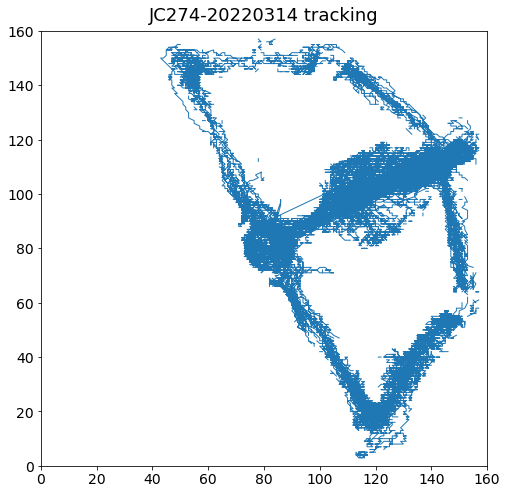

In [58]:
fig, ax = plt.subplots(figsize=(8,8))
timenow = datetime.datetime.today().strftime("%Y%m%d-%H%M%S")
ax.plot(x1, y1, linewidth=1)
ax.set_title(basename+" tracking", fontsize=18, y=1.01)
ax.tick_params(labelsize=14)
plt.xlim(0,160)
plt.ylim(0,160)
plt.show()
# plt.savefig(basename+"_tracking_"+timenow+".png")

In [59]:
timestamps.describe()

count    4.654960e+05
mean     1.117173e+08
std      6.450034e+07
min      1.000000e+00
25%      5.585884e+07
50%      1.117173e+08
75%      1.675761e+08
max      2.234349e+08
Name: timestamps, dtype: float64

In [60]:
print(timestamps.min(), timestamps.max())
print(timestamps.count())

1 223434906
465496


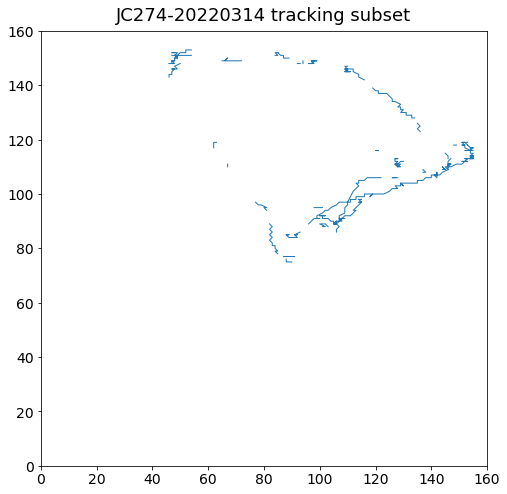

In [61]:
timestart = 0
timeend = 1_030_000
subset = pos.loc[(timestamps > timestart) & (timestamps < timeend)]

fig, ax = plt.subplots(figsize=(8,8))
timenow = datetime.datetime.today().strftime("%Y%m%d-%H%M%S")
ax.plot(subset["x1"], subset["y1"], linewidth=1)
ax.set_title(basename+" tracking subset", fontsize=18, y=1.01)
ax.tick_params(labelsize=14)
plt.xlim(0,160)
plt.ylim(0,160)
plt.show()
# plt.savefig(basename+"_tracking-subset_"+timenow+".png")

### Invalid timestamps

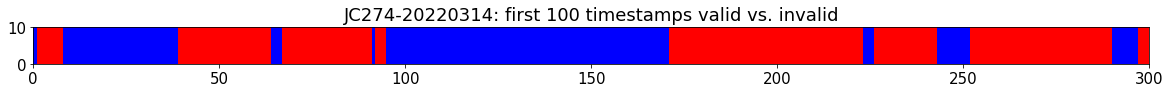

In [62]:
# For now I'm only plotting the first 100 timestamps, because otherwise it doesn't fit
subsetValid = valid[0:300]

fig, ax = plt.subplots(figsize=(20,1.5))
timenow = datetime.datetime.today().strftime("%Y%m%d-%H%M%S")
# the np function atleast_2d converts scalar and 1d arrays to 2d arrays
# bwr_r is the bwr (blue to red) cmap reversed, so that 0=red and 1=blue
ax.imshow(np.atleast_2d(subsetValid), cmap='bwr_r', extent=(0, len(subsetValid), 0, 10))
ax.set_title(basename+": first 100 timestamps valid vs. invalid", fontsize=18, y=1.01)

# plt.show()
plt.savefig(basename+"_valid-timestamps-subset_"+timenow+".png")

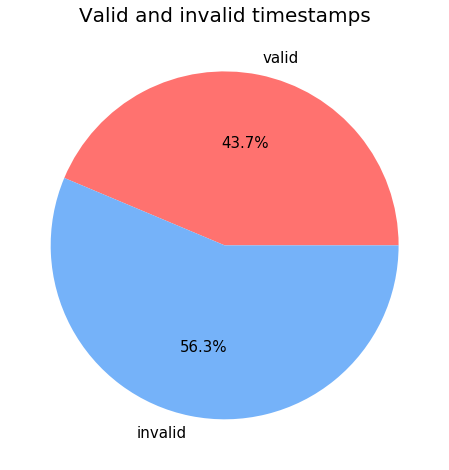

In [63]:
# I'll make a humble pie chart because I can't think of how to conserve the time data. Possibly with a matrix.
fig, ax = plt.subplots(figsize=(8,8))
labels = ['valid', 'invalid']
ax.pie([subsetValid.mean(), 1-subsetValid.mean()],
       labels=labels,
       autopct='%1.1f%%', #formatting
       colors=['#ff726f','#75b2f9'],
      )
ax.set_title("Valid and invalid timestamps", fontsize=20)
plt.show()